<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Supervised/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Classificaon with CNN (MNIST)
Goal: Build and train a CNN to classify 28×28 grayscale images of handwrien digits (0–9)
from the MNIST dataset.

In [1]:
!pip install tensorflow matplotlib

 Load and Preprocess the MNIST Dataset


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load the Mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input to include channel dimension (28x28x1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encoded labels
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize Some Images

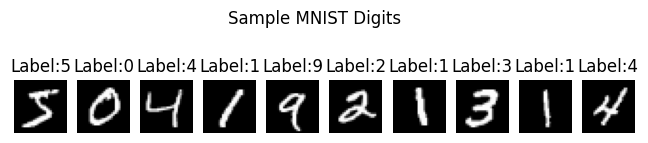

In [7]:
plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label:{y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

Build the CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNNN architechture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model

In [19]:
# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test_cat))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.9651 - loss: 0.1379 - val_accuracy: 0.9853 - val_loss: 0.0522
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.9790 - loss: 0.0864 - val_accuracy: 0.9886 - val_loss: 0.0434
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9844 - loss: 0.0653 - val_accuracy: 0.9904 - val_loss: 0.0376
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9867 - loss: 0.0563 - val_accuracy: 0.9850 - val_loss: 0.0601
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.9882 - loss: 0.0577 - val_accuracy: 0.9917 - val_loss: 0.0429


Evaluate the Model

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9891 - loss: 0.0536
Test accuracy: 0.9916999936103821


Plot Accuracy and Loss Curves

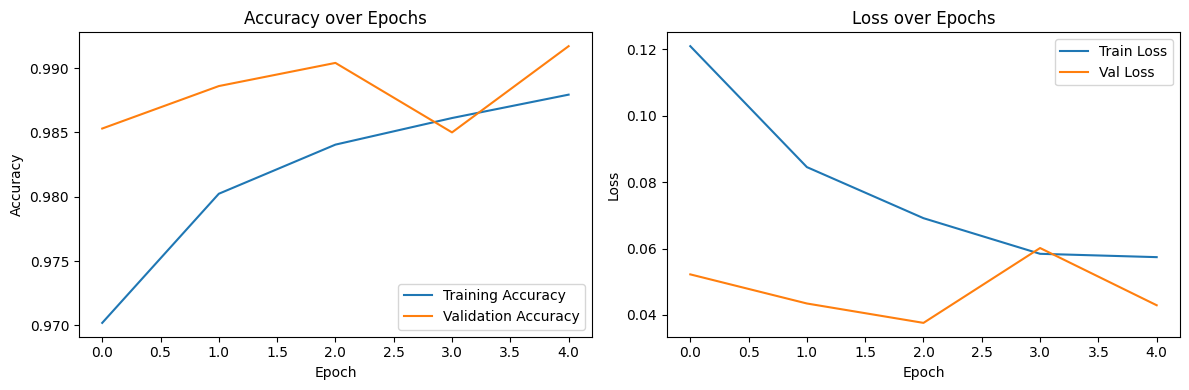

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

Predict and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


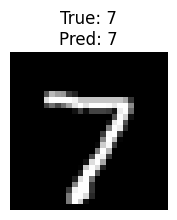

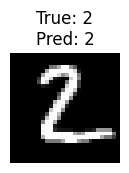

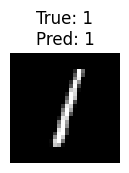

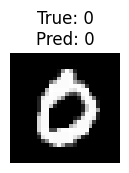

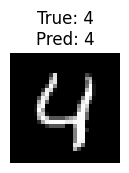

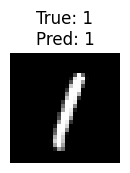

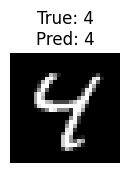

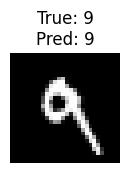

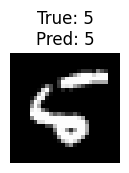

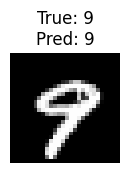

In [22]:
import numpy as np
# Predict and visualize a few results
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
